In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
%matplotlib inline
#from cirq.contrib.svg import SVGCircuit

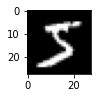

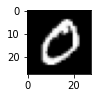

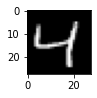

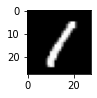

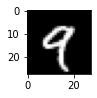

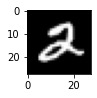

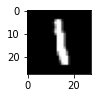

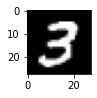

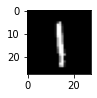

In [57]:
for i in range(9):  
    plt.subplot(330 + 1 + i)
    plt.imshow(train_X[i], cmap=plt.get_cmap('gray'))
    plt.show()

## plan: build ~10 models with various parameter sets (including different numbers of neurons in the hidden layers, different weight bias initializations, different learning rates). Calculate the error and write up a report 

In [77]:
a = np.array(X_train[1].reshape(28,28))

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

/var/folders/5h/x0nfm21j6y54l9b1cjs0r_ww0000gn/T/ipykernel_6158/539806571.py:13: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


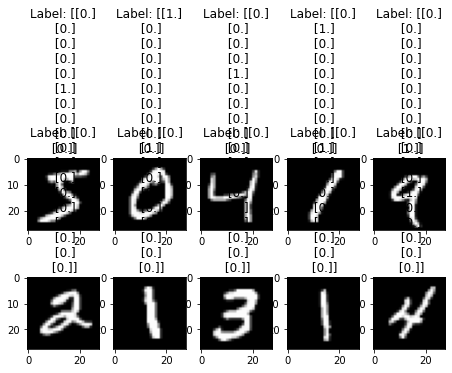

In [83]:
num = 10
images = X_train[:num]
labels = y_train[:num]
num_row = 2
num_col = 5
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    im = np.array(images[i].reshape(28,28))
    ax.imshow(im, cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

In [48]:
# load the data
import mnist_loader
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
training_data = list(training_data)
#test_data = list(test_data)

In [49]:
# for loop to extract X and y data from this list of arrays of arrays
X_train = []
y_train = []
for i in range(len(training_data)):
    X_train.append(training_data[i][0])
    y_train.append(training_data[i][1])
X_train = np.array(X_train)
y_train =np.array(y_train)
    #X_train = training_data[:]
#y_train = training_data[:]

In [68]:
X_train.shape

(50000, 784, 1)

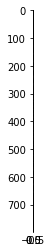

In [71]:
plt.imshow(X_train[1,:], cmap=plt.get_cmap('gray'))

In [148]:
len(y_train[0])

10

In [59]:
model = keras.Sequential(
    [
        layers.Flatten(input_shape = X_train.shape, name ="input_Layer"),
        layers.Dense(2, activation="sigmoid", name="hidden_layer1"),
        layers.Dense(3, activation="sigmoid", name="hidden_layer2"),
        layers.Dense(10, activation="softmax", name="output_layer"),
    ]
)

In [60]:
loss_fn = keras.losses.SparseCategoricalCrossentropy()
model.compile(loss=loss_fn, optimizer='adam', metrics=[tf.keras.metrics.Accuracy(),
    tf.keras.metrics.MeanSquaredError(),
    tf.keras.metrics.AUC()])                                            

In [61]:
model.fit(X_train, y_train)

ValueError: in user code:

    File "/Users/gabrielhanson/anaconda3/envs/tensorflow/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "/Users/gabrielhanson/anaconda3/envs/tensorflow/lib/python3.10/site-packages/keras/engine/training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/gabrielhanson/anaconda3/envs/tensorflow/lib/python3.10/site-packages/keras/engine/training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "/Users/gabrielhanson/anaconda3/envs/tensorflow/lib/python3.10/site-packages/keras/engine/training.py", line 1023, in train_step
        y_pred = self(x, training=True)
    File "/Users/gabrielhanson/anaconda3/envs/tensorflow/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/gabrielhanson/anaconda3/envs/tensorflow/lib/python3.10/site-packages/keras/engine/input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 50000, 784, 1), found shape=(None, 784, 1)


In [64]:
X_train.shape

(50000, 784, 1)